In [7]:
import os

import networkx as nx
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt

datapath = "../data"
localdatapath = "../local_data"

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["figure.dpi"]  = 100

Load book dataset (requires that you have the books locally in `chapters.csv`)

In [18]:
df = pd.read_csv(os.path.join(localdatapath, "chapters.csv"), header=0, index_col=0)
df["names"] = df.apply(lambda r: eval(r["names"]), axis=1)
df.head(10)

,book,title,text,names
0,0,PROLOGUE,"PROLOGUE\n\n\n\n“We should start back,” Gared ...","[Robert Baratheon, Brandon 'Bran' Stark]"
1,0,BRAN,BRAN\n\n\n\n\n\nThe morning had dawned clear a...,"[Eddard 'Ned' Stark, Robert Baratheon, Jon Sno..."
2,0,CATELYN,CATELYN\n\n\n\n\n\nCatelyn had never liked thi...,"[Eddard 'Ned' Stark, Robert Baratheon, Catelyn..."
3,0,DAENERYS,DAENERYS\n\n\n\n\n\nHer brother held the gown ...,"[Daenerys Targaryen, Jorah Mormont, Viserys Ta..."
4,0,EDDARD,EDDARD\n\n\n\n\n\nThe visitors poured through ...,"[Eddard 'Ned' Stark, Robert Baratheon, Jaime L..."
5,0,JON,"JON\n\n\n\n\n\nThere were times—not many, but ...","[Eddard 'Ned' Stark, Robert Baratheon, Jaime L..."
6,0,CATELYN,CATELYN\n\n\n\n\n\nOf all the rooms in Winterf...,"[Eddard 'Ned' Stark, Robert Baratheon, Catelyn..."
7,0,ARYA,ARYA\n\n\n\n\n\nArya’s stitches were crooked a...,"[Catelyn Stark, Jon Snow, Robb Stark, Sansa St..."
8,0,BRAN,BRAN\n\n\n\n\n\nThe hunt left at dawn. The kin...,"[Eddard 'Ned' Stark, Robert Baratheon, Jaime L..."
9,0,TYRION,TYRION\n\n\n\n\n\nSomewhere in the great stone...,"[Eddard 'Ned' Stark, Robert Baratheon, Jaime L..."


Summary statistics about book chapters

In [16]:
print(f"""
Number of chapters: {len(df)}
Number of words:    {sum(len(c.split()) for c in df.text)}
Number of letters:  {sum(len(c) for c in df.text)}
""")


Number of chapters: 358
Number of words:    1741449
Number of letters:  9419747



Load graph built by `graphing.py`

In [7]:
G = nx.read_gpickle(os.path.join(datapath, "book_char_graph.nxgraph"))

In [22]:
print(
f"""
Character graph information.
Nodes: {len(G.nodes())}
Edges: {len(G.edges())}
""" 
)


Character graph information.
Nodes: 34
Edges: 481



In [128]:
H = G.copy() # H is G, just mutated for plotting

H.remove_edges_from([e for e, w in nx.get_edge_attributes(H,'weight').items() if w < weight_cutoff] )
edge_sizes = list(nx.get_edge_attributes(H,'weight').values())
max_edge_size = max(edge_sizes)
edge_sizes = [w/max_edge_size for w in edge_sizes]


H.remove_nodes_from(list(nx.isolates(H)))
max_node_size = 400
weight_cutoff = 50
max_deg = max(d for _, d in H.degree()) 
node_sizes = list((d/max_deg)**3 * max_node_size for _, d in H.degree()) # Scale polynomially node size with number of connections

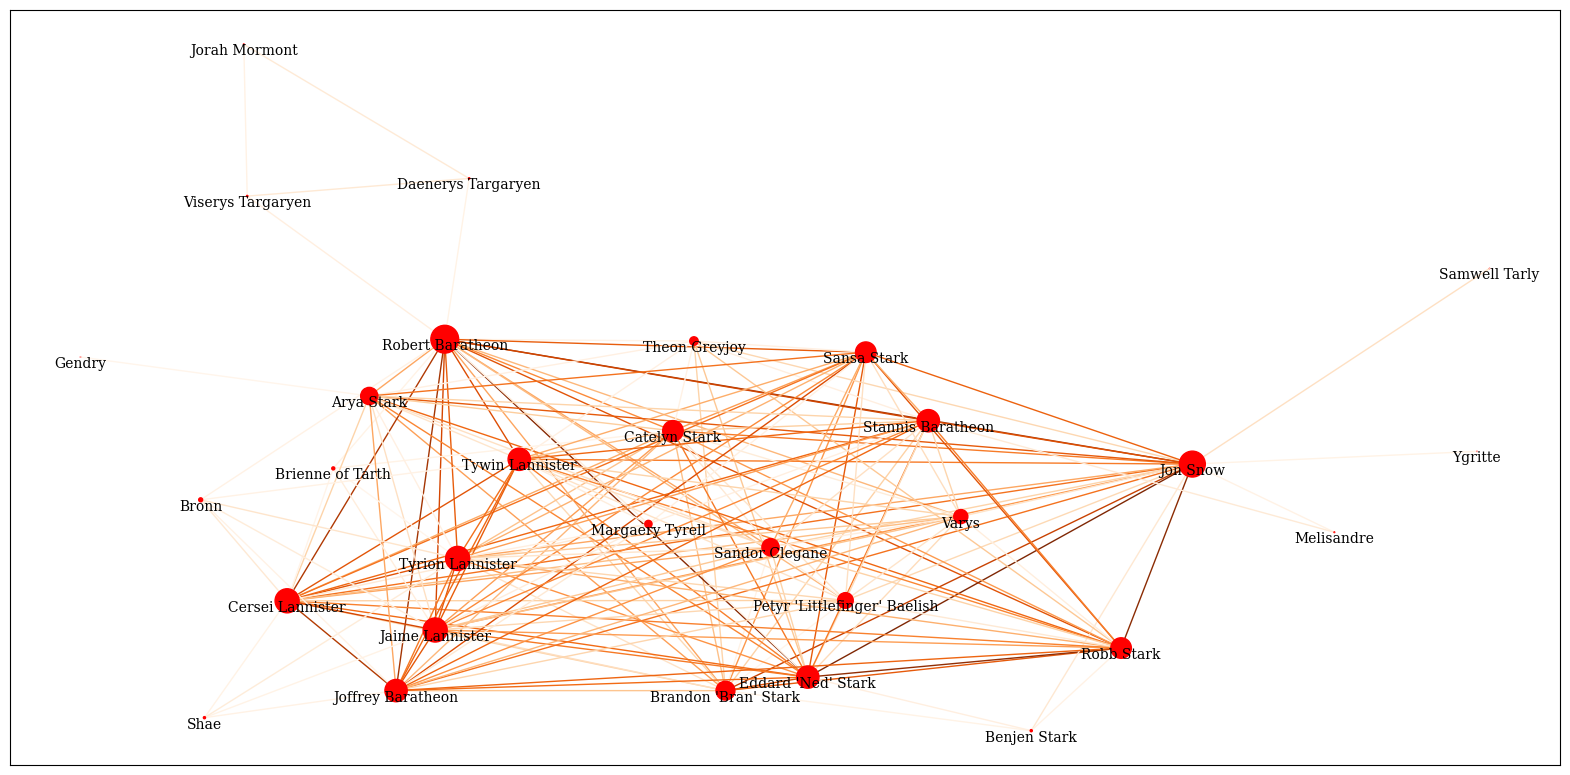

In [129]:
pos = nx.drawing.layout.kamada_kawai_layout(H)
fig, ax = plt.subplots(figsize=(20, 10))

nx.draw_networkx_nodes(H, pos=pos, ax=ax, node_size=node_sizes, node_color="r")
nx.draw_networkx_edges(H, pos=pos, ax=ax, edge_color=edge_sizes, edge_cmap=plt.cm.Oranges)
nx.draw_networkx_labels(H, pos=pos, ax=ax, font_family="serif", font_size=10, horizontalalignment="center", verticalalignment="top")

plt.show()